In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

pd.set_option('display.max_columns', None)

file_path = os.path.join(os.path.dirname(sys.path[0]), 'clean_data/gurgaon_properties_feature_selected.csv')
df = pd.read_csv(file_path)

df.sample(5)

,property_type,sector,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_score,price
2125,0,44,2,2,3,2,1,1100.000000,0,0,0,1,0.71
1929,0,75,1,1,1,0,3,826.000000,0,0,0,1,1.00
991,0,97,3,4,3,2,3,2227.111111,1,0,0,0,1.58
2665,0,85,3,3,3,0,1,1825.809524,0,0,2,1,2.20
1646,0,78,3,3,1,0,3,1391.523810,0,0,2,2,1.30


In [39]:
x = df.drop(columns=['price'])
y = df['price']

In [40]:
#to apply lr one hot encode -> sector, balcony, agePossession, furnishing_type, luxury_score, floorNum
# standardize
# log transform

In [41]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

/tmp/ipykernel_5800/476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='price', ylabel='Density'>

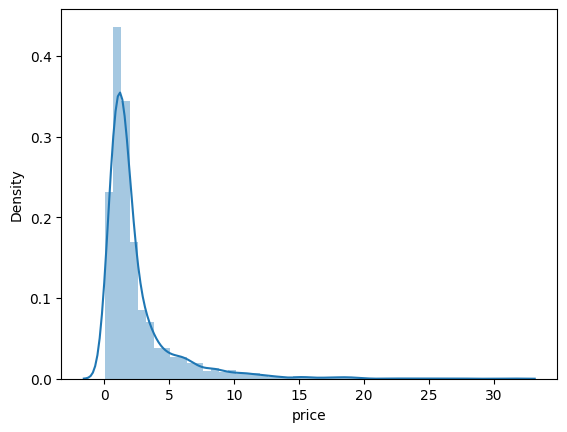

In [42]:
sns.distplot(y)

# Simple Linear Regression

In [43]:
y = np.log1p(y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),['property_type', 'bedroom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_score', 'floorNum'])
    ], remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y, cv=kfold, scoring='r2')

/home/himanshu/Projects/ML_Proj/PropertyApp/propertyapp/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/himanshu/Projects/ML_Proj/PropertyApp/propertyapp/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [44]:
scores.mean(), scores.std()

(0.8578074909318284, 0.022328673047094363)

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedroom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_score',
                                                   'floorNum'])])),
                ('regressor', LinearRegression())])

In [46]:
y_pred = np.expm1(pipeline.predict(x_test))

/home/himanshu/Projects/ML_Proj/PropertyApp/propertyapp/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test), y_pred)

0.7304601858529317

# SVR - 'rbf'

In [48]:
x = df.drop(columns=['price'])
y = df['price']

y = np.log1p(y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),['property_type', 'bedroom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_score', 'floorNum'])
    ], remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y, cv=kfold, scoring='r2')

/home/himanshu/Projects/ML_Proj/PropertyApp/propertyapp/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/himanshu/Projects/ML_Proj/PropertyApp/propertyapp/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [49]:
scores.mean(), scores.std()

(0.8877587000657776, 0.013953859833154635)

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedroom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_score',
                                                   'floorNum'])])),
                ('regressor', SVR())])

In [51]:
y_pred = np.expm1(pipeline.predict(x_test))

/home/himanshu/Projects/ML_Proj/PropertyApp/propertyapp/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [52]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(np.expm1(y_test), y_pred)

0.561999295744514